In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
train = pd.read_csv('/content/Training.csv')

In [50]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [51]:
train.isna().sum()

,0
itching,0
skin_rash,0
nodal_skin_eruptions,0
continuous_sneezing,0
shivering,0
...,...
inflammatory_nails,0
blister,0
red_sore_around_nose,0
yellow_crust_ooze,0


In [52]:
x_train = train.iloc[:,:-1]
y_train = train.iloc[:, -1]

In [53]:
from sklearn.preprocessing import MinMaxScaler
from mlxtend.plotting import plot_confusion_matrix
scale=MinMaxScaler()
scale.fit(x_train)

MinMaxScaler()

In [54]:
test = pd.read_csv('/content/Testing.csv')
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [55]:
x_test = test.iloc[:,:-1]
y_test = test.iloc[:, -1]

In [58]:
scale2=MinMaxScaler()
scale2.fit(x_test)

MinMaxScaler()

In [59]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,  precision_score, recall_score, f1_score
from sklearn.model_selection import  RandomizedSearchCV, train_test_split , GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [60]:
clf_knn = KNeighborsClassifier()
parameters_knn = {'n_neighbors': [1, 3, 5, 7, 9, 11], 'metric': ['euclidean', 'manhattan', 'minkowski']}
grid_clf_knn = GridSearchCV(clf_knn, parameters_knn, cv=6, n_jobs = -1)
grid_clf_knn.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11]})

In [61]:
best_model_knn=grid_clf_knn.best_estimator_
y_pred_knn=best_model_knn.predict(x_test)

In [62]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confution matrix for model " f'{best_model_knn} : \n',cm_knn)

Confution matrix for model KNeighborsClassifier(metric='euclidean', n_neighbors=1) : 
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [63]:
ac_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy for model " f'{best_model_knn} : \n',ac_knn)


Accuracy for model KNeighborsClassifier(metric='euclidean', n_neighbors=1) : 
 1.0


In [64]:
cr_knn = classification_report(y_test, y_pred_knn)
print("Classification report for model " f'{best_model_knn} : \n',cr_knn)

Classification report for model KNeighborsClassifier(metric='euclidean', n_neighbors=1) : 
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                

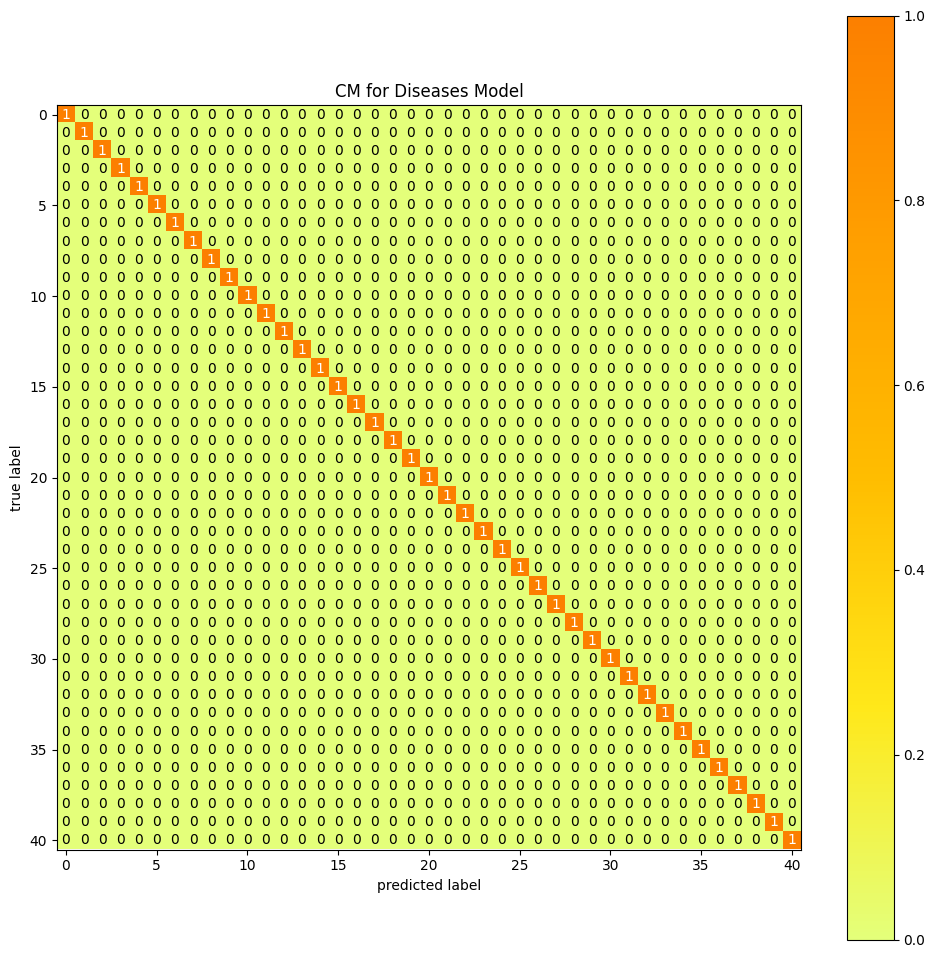

In [66]:
cm_rnf = confusion_matrix(y_test, y_pred_knn)
fig, ax = plot_confusion_matrix(conf_mat=cm_rnf ,
                                show_absolute=True,
                                colorbar=True,
                                cmap='Wistia',
                               figsize=(12, 12))
plt.title("CM for Diseases Model")
plt.show()


In [68]:
print(best_model_knn.score(x_train,y_train))

1.0


In [69]:
print(best_model_knn.score(x_test,y_test))

1.0
